In [2]:
### Distance to nearest neighbor ###
# a

# Estimating the optimal distance threshold to separate clonally related from unrelated sequecnes.
# By calculating the distance from each sequence to its nearest neighbor and define the break point
# of the resulting bimodal distribution.

# 1. Calaulate the nearest neighbor distance for each sequence in the data set.
# 2. Generate a histogram of the nearest neighbor distances using a manual inspection or
# automated threshold detection. 

# Import required packages
library(alakazam)
library(shazam)
library(dplyr)
library(ggplot2)

require(data.table)
db <- as.data.frame(fread("../../changeo_10x/filtered_contig_heavy_germ-pass.tsv"))

In [3]:
# Use nucleotide Hamming distance and normalize by junction length
dist_ham <- distToNearest(db, sequenceColumn="junction", 
                          vCallColumn="v_call", jCallColumn="j_call",
                          model="ham", normalize="len", nproc=1)

# Use genotyped V assignments, a 5-mer model and no normalization
dist_s5f <- distToNearest(db, sequenceColumn="junction", 
                          vCallColumn="v_call", jCallColumn="j_call",
                          model="hh_s5f", normalize="none", nproc=1)

In [4]:
# Single-cell mode 
# Group cells in a one-stage process (VJthenLen=FALSE) and using
# both heavy and light chain sequences (onlyHeavy=FALSE)
dist_sc <- distToNearest(db, cellIdColumn="cell", locusColumn="locus", 
                         VJthenLen=FALSE, onlyHeavy=FALSE)

ERROR: Error in distToNearest(db, cellIdColumn = "cell", locusColumn = "locus", : The column cell was not found


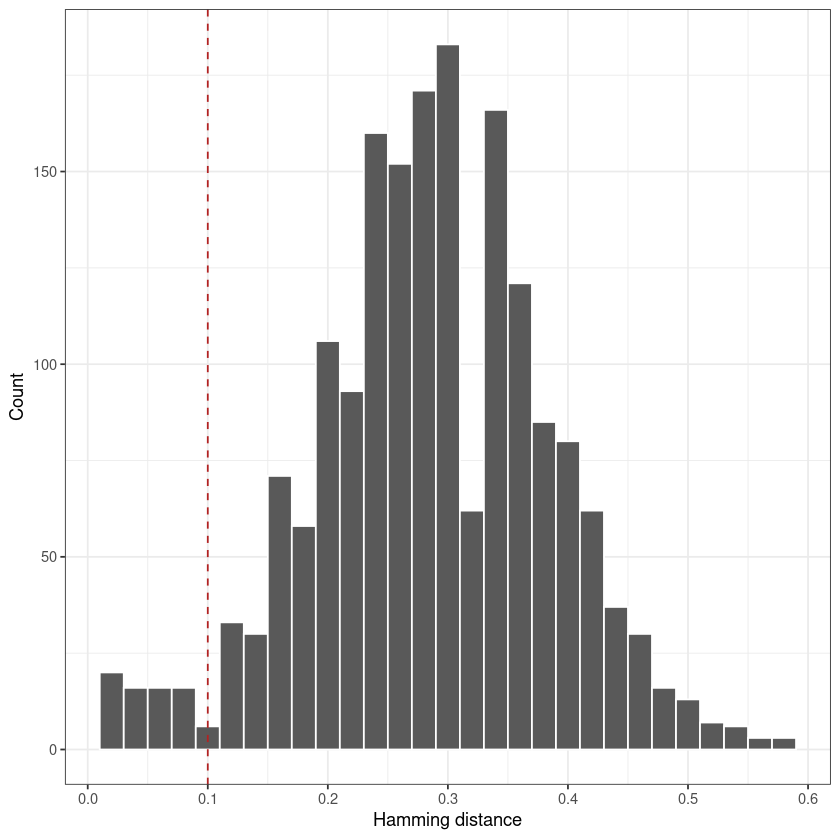

In [6]:
# Generate Hamming distance histogram
library(ggplot2)
p1 <- ggplot(subset(dist_ham, !is.na(dist_nearest)),
             aes(x=dist_nearest)) + 
    theme_bw() + 
    xlab("Hamming distance") + 
    ylab("Count") +
    scale_x_continuous(breaks=seq(0, 1, 0.1)) +
    geom_histogram(color="white", binwidth=0.02) +
    geom_vline(xintercept=0.1, color="firebrick", linetype=2)
plot(p1)

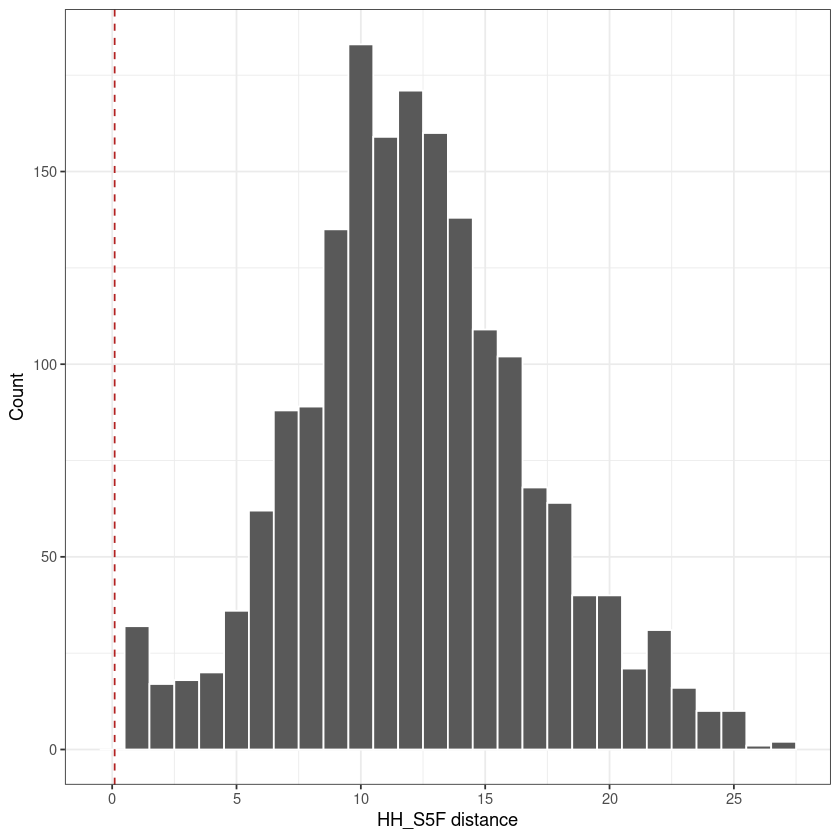

In [8]:
# Generate HH_S5F distance histogram
p2 <- ggplot(subset(dist_s5f, !is.na(dist_nearest)),
             aes(x=dist_nearest)) + 
    theme_bw() + 
    xlab("HH_S5F distance") + 
    ylab("Count") +
    scale_x_continuous(breaks=seq(0, 50, 5)) +
    geom_histogram(color="white", binwidth=1) +
    geom_vline(xintercept=0.1, color="firebrick", linetype=2)
plot(p2)

Warning message:
“Removed 1 rows containing missing values (geom_vline).”


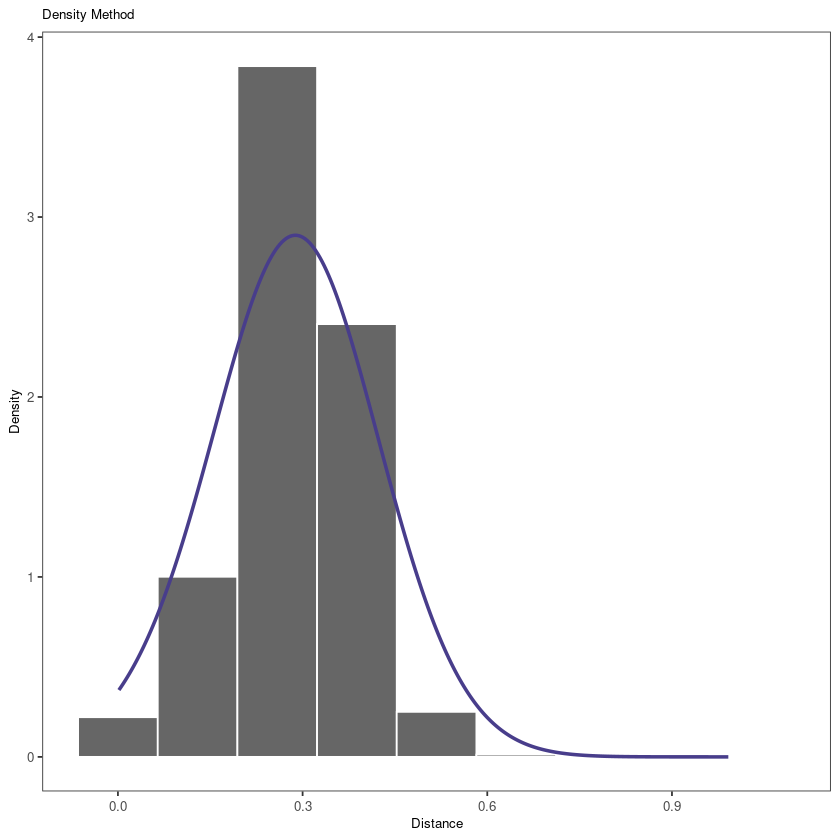

In [9]:
# Find threshold using density method
output <- findThreshold(dist_ham$dist_nearest, method="density")
threshold <- output@threshold

# Plot distance histogram, density estimate and optimum threshold
plot(output, title="Density Method")

In [10]:
# Print threshold
print(output)

[1] NA


[1] 0.1585066


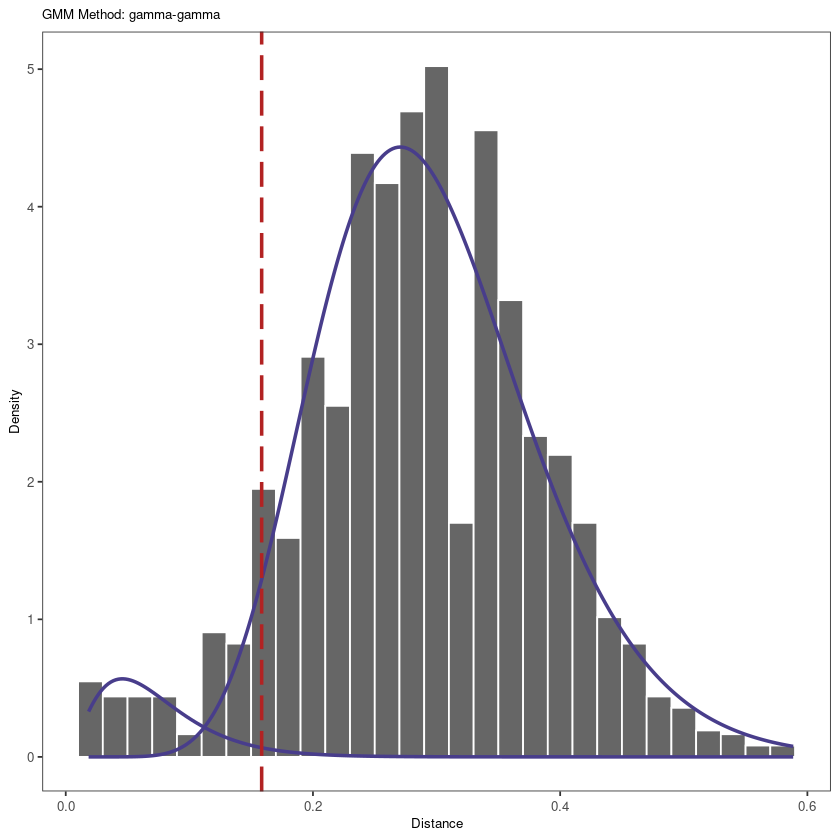

In [11]:
# Find threshold using gmm method
output <- findThreshold(dist_ham$dist_nearest, method="gmm", model="gamma-gamma")

# Plot distance histogram, Gaussian fits, and optimum threshold
plot(output, binwidth=0.02, title="GMM Method: gamma-gamma")

# Print threshold
print(output)